# How to get and use the Python packages you need for PChem Lab (CHEM461)

In CHEM461, you will take your own data on different types of equipment. You will need to get your data files into a form you can plot and analyze. We've done most of that work for you by writing programs and sections of code tailored to the specific kinds of data files that your equipment will generate. 

This Jupyter notebook compiles that code. You are welcome to cut-and-paste the code when you are ready to plot and analyze the data you have taken. If you completed the Python Tutorial for CHEM461, you already used a Jupyter notebook to practice plotting data and fitting linear and nonlinear functions to simplified (rather than real) data sets.  

The code and text in this notebook were written by Bruce Robinson, C. Praise Anyanwu, and Sarah Keller.

Our first step is to get the code. The first three lines of code in the grey cell below import pre-written, external packages for plotting, for manipulating arrays, and for fitting data, and give them shorter names of `plt`, `np`, and `sp`. The last line imports the custom package called `uwpchem`, which contains modules that will help you analyze some of the datasets you will collect in expermiments.

<b>TRY THIS:</b> Run the code in the grey cell below. To do so, click your cursor somewhere in the grey box and hit shift-return (or shift-enter) on your keyboard. For the particular commands in these lines of code, it will appear as if nothing happened. If you get logged out of this Jupyter notebook and enter again, Python will not remember that you ran this code, and you will have to run it again (which is easy to do).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os, sys

### preamble 
# Get the current script's directory
current_dir = os.path.dirname(os.path.abspath('DemoForDataAnalysis.ipynb'))
# Get the parent directory by going one level up
parent_dir = os.path.dirname(current_dir)
top_parent_dir = os.path.dirname(parent_dir)
# Add the parent directory to sys.path
sys.path.append(top_parent_dir)

from uwpchem461.pchem import Opener, Analyse

## How to use the modules in the package called uwpchem

The last line of code in the cell above imports the `Opener` module from the uwpchem package. This module contains programs (or "methods") that open data sets. The `Analyse` module contains programs that analyze data sets. 

The sections below give you pre-written code that are helpful for:
* Section 1: The method `getdata` from the module `Opener`
* Section 2: The method `caloexp()` from the module `Analyse`
* Section 3: The method `getbase()` from the module `Analyse`
* Section 4: Identifying peaks 

<b>TRY THIS:</b> Run the code in the cell below to "open" versions of `Opener` and `Analyse` on your computer. For the experts, this is called "making an instance".

In [ ]:
# Make "instances" of the modules Opener and Analyse
opener = Opener()
analyse = Analyse()

### SECTION 1: The method getdata()

Unsurprisingly, `getdata()` reads in some data and gives it back to you in a format you can use more easily. You will use it in two different experiments in CHEM461.

For any program, including `getdata()`, if you want to know what the formats are for the input and output variables, you can run Python's built-in `help()` command.

<b>TRY THIS:</b> Run the code in the cell below to have Python tell you the input and output arguments of `getdata` from the module `Opener`.

In [ ]:
help(opener.getdata)

By running the help code in the cell above, you learned that the method `getdata` reads a file formatted as a .csv file.

To read in the data you collect in Experiment 3 and Experiment 42, you are welcome to cut-and-paste the code in the cell below to fit your needs. You can also edit it to reflect how you named the .csv file of your data and where you stored that file.

If you have expertise in coding, you are welcome to read in your data some other way, but we won't be able to help if you need to debug alternative methods you use or devise.

In [ ]:
# Importing datasets using the method `get_data`

# Experiment 3
# The first line of code assumes that the relevant data are in a file named exp3_dataset.csv, 
# which is stored in the folder called Data, which is in turn stored in the folder called uwpchem.
dataset_exp3 = opener.getdata('~/uwpchem/Data/exp3_dataset.csv')
time = dataset_exp3[:, 0]                          # Data for time are in the 1st column
temperature = dataset_exp3[:, 1] + 273             # Data for temp are in the 2nd column
                                                   # Units of temp are Kelvin

# Experiment 42
# The first line of code assumes that the relevant data are in a file named exp42_dataset.csv, 
# which is stored in the folder called Data, which is in turn stored in the folder called uwpchem.
dataset_exp42 = opener.getdata('~/uwpchem/Data/exp42_dataset.csv')
wavenumbers = dataset_exp42[1:, 0].astype(float)   # Data for wavenumber are in the 1st column
                                                   # Units of wavenumbers are 1/cm
transmission = dataset_exp42[1:, 1].astype(float)  # Data for transmission are in the 2nd column
                                                   # Units of transmission are percent

### SECTION 2: The method caloexp()

The method `caloexp()` applies to Experiment 3, which uses calorimetry. The following equation should apply to your data for temperature, $T$, vs. time, $t$:

$dT/dt = Rate_{\mathrm{heat~gain}} - Rate_{\mathrm{heat~loss}}(T - T_{\mathrm{room}}) + Rate_{\mathrm{reaction}} \Delta T \exp(-Rate_{\mathrm{reaction}}(t - t_{\mathrm{start}}))$

This equation is your model.
* $Rate_{\mathrm{heat~gain}}$ is the constant rate at which heat is gained by the calorimeter due to stirring.
* $Rate_{\mathrm{heat~loss}}$ is the rate of heat lost by the calorimeter~; this rate is proportional to the difference between the temperature of the calorimeter, $T$, and the temperature of the room, $T_{\mathrm{room}}$.
* $Rate_{\mathrm{reaction}}$ is the rate at which the reaction gives heat to the calorimeter.

One of your tasks in Experiment 3 is to fit the model to your data. In the sections below, we introduce how to optimize that fit. 

<b>TRY THIS:</b> Run the code in the cell below to have Python tell you the input and output arguments of `caloexp()` from the module `Analyse`, which has the alias `analyse`.

In [ ]:
help(analyse.caloexp)

By running the help code in the cell above, you learned that the method `caloexp()` has TWO classes of input arguments: required arguments and optional <b>keyword arguments</b>. The optional keyword arguments are `tstart`, `Tstart`, and `Tres`. Specifically, the help information above is telling you that if no numbers are specified for these keyword arguments, the code will use its own default values for them, which are `tstart=145`, `Tstart=291`, `Tres=293`. If your experiment uses different times and temperatures than these, then change the default values in the code to reflect your values.

#### Using the method caloexp() with guesses for the parameters
A first step in fitting a model is to make some guesses for the parameters. 

<b>TRY THIS:</b> Run the code in the cell below make gueses for the relevant parameters of `caloexp()`.

In [ ]:
# The lines below input values for four guesses into the four parameters used by caloexp()
# For your own data set, you may decide that you need to use different values!
rate_heatgain = 0.003
rate_heatloss = 0.001
rate_reaction = 0.02
DeltaT = 5

<b>TRY THIS:</b> Run the code in the cell below to tell `caloexp()` to predict values for the temperature through time based on: 1) the equation for the model, 2) the relevant parameters in the previous cell, and 3) the keyword arguments for $t_{start}$, $T_{start}$, and $T_{room}$. 

Note that we have NOT optimized our fit yet.

In [ ]:
# Runs the method caloexp() and puts the results in an array called guess_temperature.
# Notice that the line of code below specifies the values of optional keyword arguments.
# For your data, different values may be relevant!
guess_temperature = analyse.caloexp(time, rate_heatgain, rate_heatloss, rate_reaction, DeltaT,
                                   tstart=145, Tstart=291, Troom=291)

In [ ]:
# Plots the result from the unoptimized fit of the model from caloexp() on top of the data

# Define Fig. 1
fig1, ax1 = plt.subplots()

# Plot the original dataset
ax1.plot(time, temperature, linestyle='None',
         marker='o', color='black', markerfacecolor='none', label='data')

# Plot the predicted temperature vs time from the unoptimized model from the method caloexp()
ax1.plot(time, guess_temperature, linestyle='dashed', linewidth='2',
         color='red', label='unoptimized model')
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Temperature [K]')
ax1.legend()

#### Using the method caloexp() with optimized parameters
The next step in fitting a model is to optimize the parameters. 

<b>TRY THIS:</b> Run the code in the cell below obtain optimized parameters of `caloexp()`.

In [ ]:
# Telling Python which parameters should be optimized in the fit
fitfunc = lambda xdata, rate_heatgain, rate_heatloss, rate_reaction, DeltaT: \
    analyse.caloexp(xdata, rate_heatgain, rate_heatloss, rate_reaction, DeltaT,
                    tstart=145, Tstart=291, Troom=291)

# the fitting procedure using the model of the method caloexp
guess_parameters = [rate_heatgain, rate_heatloss, rate_reaction, DeltaT]
popt, pcov = sp.optimize.curve_fit(fitfunc, time, temperature, p0=guess_parameters)

In [ ]:
# Giving names to the four optimized parameters
rate_heatgain_optimized = popt[0]
rate_heatloss_optimized = popt[1]
rate_reaction_optimized = popt[2]
DeltaT_optimized = popt[3]

In [ ]:
# Finding the temperature through time predicted by the model function, using its optimized parameters
predicted_temperature = analyse.caloexp(time, 
                                        rate_heatgain_optimized, 
                                        rate_heatloss_optimized, 
                                        rate_reaction_optimized, 
                                        DeltaT_optimized)

In [ ]:
# Plot the model function, with the optimized parameters, against the dataset
ax1.plot(time, predicted_temperature, label='optimized model function', linewidth='2', color='deepskyblue')
ax1.legend()
fig1

### SECTION 3: The method getbase()

The method `getbase()` applies to Experiment 42, which measures spectra. The code helps you find a baseline for the spectra and subtract it from the dataset. This baseline substraction helps remove noise in the data and make your data more accurate.

<b>TRY THIS:</b> Run the code in the cell below to have Python tell you the input and output arguments of `getbase()` from the module `Analyse`, which has the alias `analyse`.

In [ ]:
help(analyse.getbase)

By running the help code above, you learned that the method `getbase()` has TWO types of input arguments: some required arguments and some optional <b>keyword arguments </b>. The keyword arguments are `nfitpts` and `adjust`. The help information above is telling you that if no numbers are specified for these keyword arguments, the code will use its own default values for them, which are `nfitpts=30`, `adjust=25`. If different values are relevant to your spectra, then you need to type in those values instead. For example, `nfitpts` often needs to be adjusted to find a good baseline. 

The following lines of code demonstrate how to use `getbase()` with its input and output arguments:

#### First, convert data in transmittance into data in absorbance

In [ ]:
# convert transmittance to absorbance
absorbances = -np.log10(transmission/100)

In [ ]:
# Figure 4
# Two-panel graph: transmission vs wavenumber and absorbance vs wavenumber
# The line of code below says the two panels should be plotted in one row
# and in two columns, where the size of the whole figure is 15 wide and 5 tall.
figure4, axis4 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting the dataset for transmission vs wavenumber
axis4[0].plot(wavenumbers, transmission, linestyle='solid',
         marker='None', color='royalblue', label='Exp 42, transmission values')
axis4[0].set_xlabel('wavenumber [1/cm]')
axis4[0].set_ylabel('transmission [%]')
axis4[0].legend()

# Plotting the dataset for absorbance vs wavenumber
axis4[1].plot(wavenumbers, absorbances, linestyle='solid',
         marker='None', color='black', label='Exp 42, absorbance values')
axis4[1].set_xlabel('wavenumber [1/cm]')
axis4[1].set_ylabel('absorbance [unitless]')
axis4[1].legend()

#### Crop the dataset to leave only one set of peaks of interest

In [69]:
# The lines of code below crop the data in Figure 4 to leave only a single set of peaks
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!

index_set2 = np.where((wavenumbers >= 2575) & (wavenumbers <= 3175))[0]
     # Line 1 finds the indexes of the points that have wavenumbers between 2575 and 3175 cm^-1.
wavenumbers_set2 = wavenumbers[index_set2]
     # Line 2 saves a list of wavenumbers with those indexes in a new array called wavenumbers_set2
absorbances_set2 = absorbances[index_set2]
     # Line 2 saves a list of absorbances with those indexes in a new array called absorbances_set2

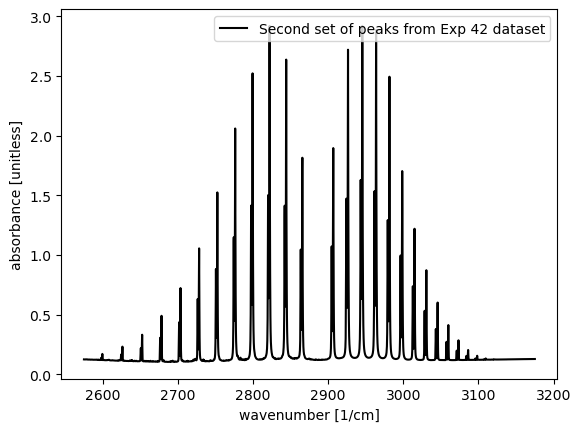

In [70]:
# Figure 5: Graph of absorbance vs wavenumber for the cropped data
# This example focuses on the second set of peaks, between the wavenumbers 2575 to 3175 cm^-1.
# For your data, different wavenumbers may be relevant!
figure5, axis5 = plt.subplots()

# Plotting the cropped dataset for absorbance vs wavenumber
axis5.plot(wavenumbers_set2, absorbances_set2, linestyle='solid',
         marker='None', color='black', label='Second set of peaks from Exp 42 dataset')
axis5.set_xlabel('wavenumber [1/cm]')
axis5.set_ylabel('absorbance [unitless]')
axis5.legend()

#### Create an array of the cropped dataset for a baseline correction

Once you have plotted Fig. 5 above, a best practice is to correct the basline of the dataset. This means shifting the data so that the lowest values are at zero. We'll do that using the method `getbase()`, following the steps below.

In [71]:
# Create new array of the dataset with dimensions n x 2, 
# where the x-values are wavenumbers and the y-values are absorbances.
dataset_set2 = [[wavenumber_set2, absorbances_set2[index]]
                      for index, wavenumber_set2 in enumerate(wavenumbers_set2)]

In [72]:
# Define a value called "hibar" that is HIGHER than the troughs between each peak. 
# For your data, a different value of hibar may be relevant!
hibar = 0.14

# Run the method getbase() on the cropped dataset to calculate the baseline for that dataset
baseline_set2 = analyse.getbase(dataset_set2, hibar)

In [73]:
# Plot the baseline over the cropped dataset in the existing Figure 5

axis5.plot(wavenumbers_set2, baseline_set2, linestyle='solid',
         marker='None', color='red', label='Baseline')
axis5.legend()

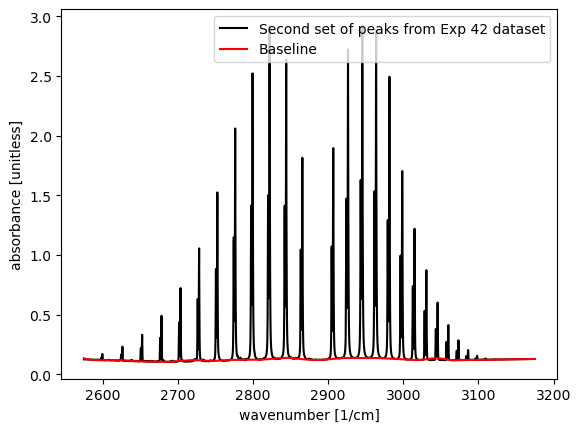

In [74]:
# Show the graph of figure 5, with the baseline
figure5

By eye, verify that the baseline seems to be (mostly) following the bottom of the peaks. If so, you are ready to move on to the next step.

#### Baseline substraction
Now, you can subtract the baseline from the datset by running the code in the following cells. In doing do, you will generate a corrected set of data.

In [57]:
# The single line of code below generates a new array of data.
# The name of the new array (absorbances_set2_corrected) reflects that the data are
#      - for absorbances vs wavenumber
#      - cropped to leave only the second set of peaks
#      - shifted to subtract the baseline

absorbances_set2_corrected = absorbances_set2 - baseline_set2
# dataset_set2_corrected = [[wavenumber_set2, absorbances_set2_corrected[index]] 
#                            for index, wavenumber_set2 in enumerate(wavenumbers_set2)]

Text(3000, 2.5, 'Figure 6')

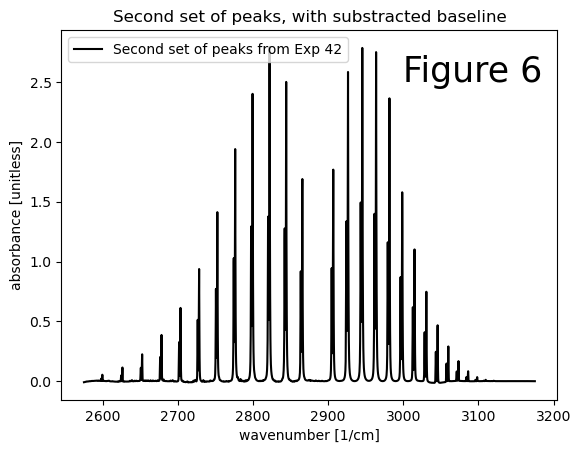

In [82]:
# Figure 6: Plot the new array of data. These data are 
#           - for absorbance vs wavenumber
#           - cropped to leave only the second set of peaks, and
#           - shifted to subtract the baseline
figure6, axis6 = plt.subplots()

axis6.plot(wavenumbers_set2, absorbances_set2_corrected, linestyle='solid',
         marker='None', color='black', label='Second set of peaks from Exp 42')
axis6.set_xlabel('wavenumber [1/cm]')
axis6.set_ylabel('absorbance [unitless]')
axis6.set_title('Second set of peaks, with substracted baseline')
axis6.legend()
axis6.text(3000, 2.5, 'Figure 6', dict(size=25))

If everything went well, the figure right above this text (Figure 6) should show a set of peaks that now has a much flatter baseline, with minimum values near absorbance = 0.0. These changes should make it easier to accurately locate the peaks in the spectra.

## SECTION 4: Locating all peaks in a set
To locate individual peaks within the set of peaks in Figure 6, you can use the following code:

In [83]:
# The line code below puts the indexes of the peaks in an array called indexes_set2_peaks
indexes_set2_peaks, _ = sp.signal.find_peaks(absorbances_set2_corrected, height=0.14)
# The code will find peaks only when the y-values are greater than the `height` value specified

In [84]:
# Plot the locations of the peaks over the cropped dataset in the existing Figure 6
axis6.plot(wavenumbers_set2[indexes_set2_peaks], 
           absorbances_set2_corrected[indexes_set2_peaks],
          marker='x', color='darkorange', linestyle='None', label='Individual peaks in the second set')
axis6.legend()

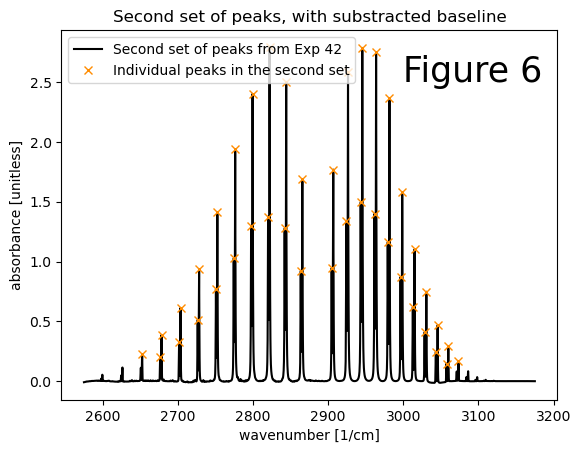

In [85]:
# Show Figure 6, with the peaks
figure6

We are done with the coding part. Now, you get to do the fun part -- the thinking! Return to your lab writeup to find what to do next. Your next step is likely to determine which sets of peaks belong to which isotope and to understand why the spectra look like they do.